In [6]:
pip install torch torchvision


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.9.0 which is incompatible.


  Using cached typing_extensions-4.9.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


Epoch [100/1000], Train Loss: 2.1272, Test Loss: 2.1086
Epoch [200/1000], Train Loss: 1.8631, Test Loss: 1.8832
Epoch [300/1000], Train Loss: 1.6141, Test Loss: 1.7059
Epoch [400/1000], Train Loss: 1.3467, Test Loss: 1.4270
Epoch [500/1000], Train Loss: 1.1231, Test Loss: 1.1893
Epoch [600/1000], Train Loss: 0.9766, Test Loss: 1.0520
Epoch [700/1000], Train Loss: 0.8279, Test Loss: 0.8436
Epoch [800/1000], Train Loss: 0.7746, Test Loss: 0.9361
Epoch [900/1000], Train Loss: 0.6714, Test Loss: 0.9528
Epoch [1000/1000], Train Loss: 0.6493, Test Loss: 0.7517
Accuracy: 0.8583333333333333


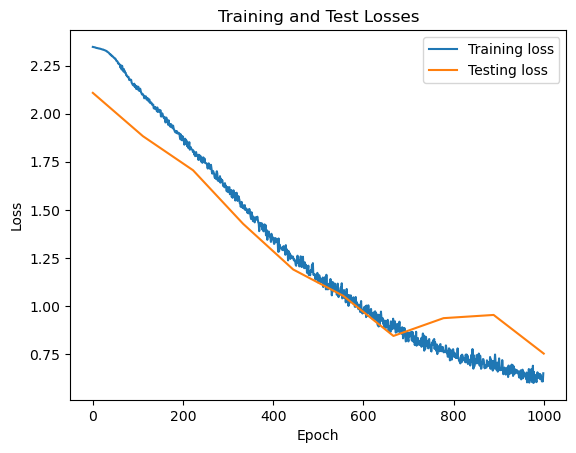

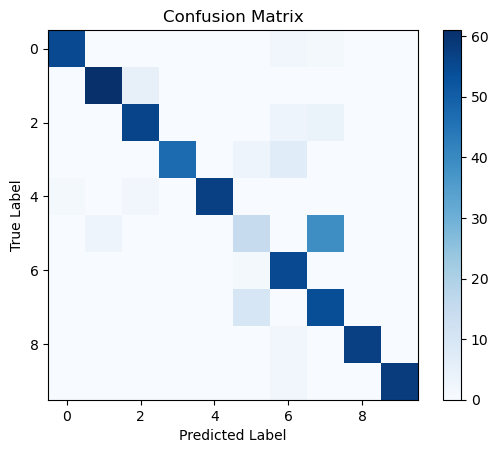

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Reading the data
data = pd.read_csv("PQM_FACTORS.csv")

# Separating features and target variable
features = data.columns.difference(['Seriousness'])
X = data[features]
Y = pd.get_dummies(data["Seriousness"])  # One-hot encode the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

# Define a more complex neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 16)
        self.fc8 = nn.Linear(16, 8)
        self.fc9 = nn.Linear(8, 4)
        self.fc10 = nn.Linear(4, output_size)
        self.dropout = nn.Dropout(0.45)
    
    def forward(self, x):
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = self.dropout(torch.relu(self.fc4(x)))
        x = self.dropout(torch.relu(self.fc5(x)))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = torch.relu(self.fc8(x))
        x = torch.relu(self.fc9(x))
        x = self.fc10(x)
        return x

# Create the model
model = NeuralNetwork(input_size=X_train.shape[1], output_size=y_train.shape[1])

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
train_losses, test_losses = [], []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, torch.max(y_train_tensor, 1)[1])
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            test_output = model(X_test_tensor)
            test_loss = criterion(test_output, torch.max(y_test_tensor, 1)[1])
            test_losses.append(test_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Make predictions on the test set
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    predicted_labels = torch.argmax(predictions, dim=1)
    true_labels = torch.argmax(y_test_tensor, dim=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels.numpy(), predicted_labels.numpy())
print("Accuracy:", accuracy)

# Plot training and test losses
plt.plot(train_losses, label='Training loss')
plt.plot(np.linspace(0, num_epochs, len(test_losses)), test_losses, label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(true_labels.numpy(), predicted_labels.numpy())
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
from typing import Tuple

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchview import draw_graph
import numpy as np

%matplotlib inline
sns.set(rc={'figure.figsize':(10,7)})
sns.set(rc={'figure.dpi':100})
sns.set(style='white', palette='muted', font_scale=1.2)

np.random.seed(42)
torch.manual_seed(42)

In [14]:
# Reading the data
df = pd.read_csv("PQM.csv")
df.shape

(3000, 11)

In [15]:
df.head()


,DBP,SBP,BSL,OL,HR,BTemp,BR,U,PF,HL,Seriousness
0,74.00,101.56,40.04,95.39,71.17,98.06,17.47,5.40,88.29,56.22,Moderate
1,67.87,72.77,86.81,40.35,95.70,97.86,14.90,5.72,92.06,64.56,Serious
2,99.90,112.77,103.41,96.07,48.78,98.59,16.26,11.55,88.77,50.35,High
3,73.30,64.81,86.56,97.62,72.92,98.42,22.42,6.32,88.73,59.67,Moderate
4,72.67,86.94,110.78,37.69,34.51,98.01,9.86,6.94,89.38,62.36,Moderate


In [16]:
df.Seriousness.value_counts()

Seriousness
Moderate       300
Serious        300
High           300
Mild           300
Significant    300
Trivial        300
Urgent         300
Emergency      300
Critical       300
Minimal        300
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [17]:
train_set,test_set=train_test_split(df,test_size=0.2)

In [18]:
train_set=train_set.reset_index(drop=True)
test_set=test_set.reset_index(drop=True)

In [19]:
train_set.shape,test_set.shape

((2400, 11), (600, 11))

In [22]:
train_set[["DBP","SBP","BSL","OL","HR","BTemp","BR","U","PF","HL"]].to_numpy

<bound method DataFrame.to_numpy of         DBP     SBP     BSL     OL      HR   BTemp     BR      U      PF  \
0     72.73  100.50  107.32  98.77   81.68   97.62  17.39   4.76   83.97   
1     64.83   99.41   77.82  95.00   83.74   97.88  12.15   6.25   96.93   
2     43.64  116.68  303.70  96.97  122.19   97.53  12.56   6.25   73.70   
3     76.06   89.23  110.84  96.51   90.90   98.27  29.40   6.32  100.49   
4     74.64   81.24   86.06  96.05  118.37   98.41  17.46   5.52   97.27   
...     ...     ...     ...    ...     ...     ...    ...    ...     ...   
2395  72.97  107.56   70.96  99.56   70.65  104.10  16.26   5.21   95.21   
2396  71.71  109.80  111.44  99.14   87.35   97.90  16.23   5.61   67.62   
2397  72.94   62.25   70.64  95.37   79.29   97.86  12.92   6.29   80.55   
2398  68.36   74.03  107.26  96.08   76.31   97.64  14.79  13.34   62.67   
2399  43.11  136.65   95.13  96.11  129.43  103.10  21.37   4.90   63.02   

         HL  
0     63.32  
1     51.15  
2     48.

In [32]:
def create_dataset(data: pd.DataFrame) -> tuple:
    Seriousness_map = {
        'Minimal': 0,
        'Trivial': 1,
        'Mild': 2,
        'Moderate': 3,
        'Significant': 4,
        'Serious': 5,
        'High': 6,
        'Critical': 7,
        'Urgent': 8,
        'Emergency': 9,
    }
    features = torch.tensor(
        data[["DBP","SBP","BSL","OL","HR","BTemp","BR","U","PF","HL"]].to_numpy(),
        dtype=torch.float
    )
    labels = torch.tensor(data.Seriousness.map(Seriousness_map), dtype=torch.long)
    return features, labels


In [37]:
X_train,y_train=create_dataset(train_set)
X_test,y_test=create_dataset(test_set)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([2400, 10]),
 torch.Size([2400]),
 torch.Size([600, 10]),
 torch.Size([600]))

In [51]:
pip install torchviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4136 sha256=ee7de0be6baf4fe35de93273f9428b31bcc6f8e2a59325f8b1acbd1c6ad06fd6
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\5a\d0\3f\b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [80]:
class SeriousnessClassifier(nn.Module):
    def __init__(self,n_features:int,n_classes:int):
        super(SeriousnessClassifier,self).__init__()
        self.linear_layer_1=nn.Linear(10,10)
        self.linear_layer_2=nn.Linear(10,10)
        self.output=nn.Linear(10,10)

        nn.init.xavier_uniform_(self.linear_layer_1.weight)
        nn.init.zeros_(self.linear_layer_1.bias)
        nn.init.xavier_uniform_(self.linear_layer_2.weight)
        nn.init.zeros_(self.linear_layer_2.bias)
        nn.init.xavier_uniform_(self.output.weight)
        nn.init.zeros_(self.output.bias)

    def forward(self,features):
        x=torch.relu(self.linear_layer_1(features))
        x=torch.relu(self.linear_layer_2(x))
        return self.output(x)

In [79]:
net = SeriousnessClassifier().to(device)

TypeError: SeriousnessClassifier.__init__() missing 2 required positional arguments: 'n_features' and 'n_classes'

In [81]:
model=SeriousnessClassifier(n_features=10,n_classes=10)

In [82]:
model

SeriousnessClassifier(
  (linear_layer_1): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=10, bias=True)
)

In [83]:
result=model(X_train)

In [84]:
result[:2]

tensor([[ -6.2677,  36.7823,  34.3750,  57.5248, -14.7331,  19.4546, -81.3374,
          39.6299, -14.0295,  41.0032],
        [ -2.3126,  29.1321,  33.6945,  60.6884, -10.3849,  17.9999, -76.5755,
          28.0320, -13.7261,  37.7351]], grad_fn=<SliceBackward0>)

In [85]:

model_graph=draw_graph(model,input_size=(1,10),device='cpu')
model_graph.view()


'Digraph.gv.pdf'

In [88]:
# test_net.py

import torch as T
device = T.device("cpu")

class Net(T.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hid1 = T.nn.Linear(10, 10)  # 6-(10-10)-3
    self.hid2 = T.nn.Linear(10, 10)
    self.oupt = T.nn.Linear(10, 10)

    T.nn.init.xavier_uniform_(self.hid1.weight)
    T.nn.init.zeros_(self.hid1.bias)
    T.nn.init.xavier_uniform_(self.hid2.weight)
    T.nn.init.zeros_(self.hid2.bias)
    T.nn.init.xavier_uniform_(self.oupt.weight) 
    T.nn.init.zeros_(self.oupt.bias)

  def forward(self, x):
    z = T.tanh(self.hid1(x))
    z = T.tanh(self.hid2(z))
    z = self.oupt(z)  # assumes CrossEntropyLoss()
    return z

print("\nBegin test ")

T.manual_seed(1)

net = Net().to(device)
# male, 50.0 units completed,
#  nebraska, 654 test score
x = T.tensor([[90,130,90,95,70,99,18,5,82,50]],
      dtype=T.float32).to(device)
y = net(x)

print("\ninput = ")
print(x)
print("output = ")
print(y)




Begin test 

input = 
tensor([[ 90., 130.,  90.,  95.,  70.,  99.,  18.,   5.,  82.,  50.]])
output = 
tensor([[ 0.5351,  0.9426,  1.1401, -0.7817, -0.0081, -0.3654,  0.3150,  1.3784,
          0.2268,  0.8742]], grad_fn=<AddmmBackward0>)
